# Covid_19 Project on Machhine Learning

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

# Problem Statement:

# UnitedStates_COVID_19_dataset

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in the USA.

# Data Information

This table contains an aggregation of each USA State-level data. 

File naming convention

# Field description

1-> Province_State - The name of the State within the USA.

2-> Country_Region - The name of the Country (US).

3-> Last_Update - The most recent date the file was pushed.

4-> Lat - Latitude.

5-> Long_ - Longitude.

6-> Confirmed - Aggregated confirmed case count for the state.

7-> Deaths - Aggregated Death case count for the state.

8-> Recovered - Aggregated Recovered case count for the state.

9-> Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).

10-> FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.

11-> Incident_Rate - confirmed cases per 100,000 persons.

12-> People_Tested - Total number of people who have been tested.

13-> People_Hospitalized - Total number of people hospitalized.

14-> Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.

15-> UID - Unique Identifier for each row entry.

16-> ISO3 - Officialy assigned country code identifiers.

17-> Testing_Rate - Total number of people tested per 100,000 persons.

18-> Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.


In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly as py


%matplotlib inline
import math
import random
from datetime import timedelta

#color pallette
cnf='#393e46'
dth='#ff2e63'
rec='#21bf73'
act='#fe9801'

import warnings
warnings.filterwarnings('ignore')

In [4]:
covid=pd.read_csv('UnitedStates_COVID_19_dataset.csv')

In [5]:
covid.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-05-21 02:32:54  32.3182  -86.9023   
1          Alaska             US  2020-05-21 02:32:54  61.3707 -152.4044   
2  American Samoa             US  2020-05-21 02:32:54 -14.2710 -170.1320   
3         Arizona             US  2020-05-21 02:32:54  33.7298 -111.4312   
4        Arkansas             US  2020-05-21 02:32:54  34.9697  -92.3731   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0      13052     522        NaN  12530.0     1     266.194321       164450.0   
1        401      10      352.0     39.0     2      54.815493        37045.0   
2          0       0        NaN      0.0    60       0.000000          124.0   
3      14906     747     3773.0  10386.0     4     204.788838       165435.0   
4       5003     107     3852.0   1044.0     5     165.782801        96258.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0               1493.0        3.999387  84000001  USA   3353.942386   
1                  NaN        2.493766  84000002  USA   5063.940017   
2                  NaN             NaN        16  ASM    222.857246   
3               1792.0        5.011405  84000004  USA   2272.859351   
4                535.0        2.138717  84000005  USA   3189.670370   

   Hospitalization_Rate  
0             11.438860  
1                   NaN  
2                   NaN  
3             12.022005  
4             10.693584

In [6]:
covid.shape

(58, 18)

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [8]:
covid.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

<AxesSubplot:>

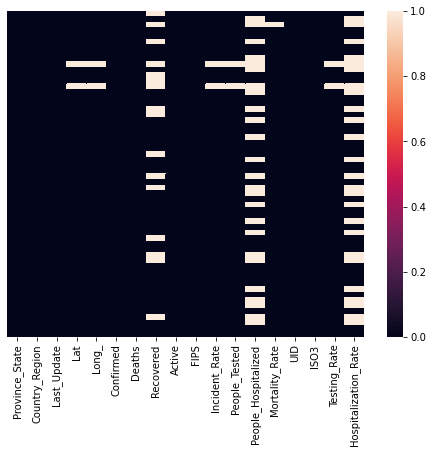

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(covid.isnull(),yticklabels=False)

In [10]:
#replacing the mean value with NaN values in Age attribute 
# Imputing the missing Values with mode
for col in ['Lat','Long_','Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Hospitalization_Rate','Testing_Rate','Confirmed','Deaths','Deaths','Active','Mortality_Rate','Incident_Rate']:
    covid[col].fillna(covid[col].mean(), inplace=True)

covid.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [11]:
covid

Province_State Country_Region          Last_Update        Lat  \
0                    Alabama             US  2020-05-21 02:32:54  32.318200   
1                     Alaska             US  2020-05-21 02:32:54  61.370700   
2             American Samoa             US  2020-05-21 02:32:54 -14.271000   
3                    Arizona             US  2020-05-21 02:32:54  33.729800   
4                   Arkansas             US  2020-05-21 02:32:54  34.969700   
5                 California             US  2020-05-21 02:32:54  36.116200   
6                   Colorado             US  2020-05-21 02:32:54  39.059800   
7                Connecticut             US  2020-05-21 02:32:54  41.597800   
8                   Delaware             US  2020-05-21 02:32:54  39.318500   
9           Diamond Princess             US  2020-05-21 02:32:54  36.840089   
10      District of Columbia             US  2020-05-21 02:32:54  38.897400   
11                   Florida             US  2020-05-21 02:32:54  27.766300   
12                   Georgia             US  2020-05-21 02:32:54  33.040600   
13            Grand Princess             US  2020-05-21 02:32:54  36.840089   
14                      Guam             US  2020-05-21 02:32:54  13.444300   
15                    Hawaii             US  2020-05-21 02:32:54  21.094300   
16                     Idaho             US  2020-05-21 02:32:54  44.240500   
17                  Illinois             US  2020-05-21 02:32:54  40.349500   
18                   Indiana             US  2020-05-21 02:32:54  39.849400   
19                      Iowa             US  2020-05-21 02:32:54  42.011500   
20                    Kansas             US  2020-05-21 02:32:54  38.526600   
21                  Kentucky             US  2020-05-21 02:32:54  37.668100   
22                 Louisiana             US  2020-05-21 02:32:54  31.169500   
23                     Maine             US  2020-05-21 02:32:54  44.693900   
24                  Maryland             US  2020-05-21 02:32:54  39.063900   
25             Massachusetts             US  2020-05-21 02:32:54  42.230200   
26                  Michigan             US  2020-05-21 02:32:54  43.326600   
27                 Minnesota             US  2020-05-21 02:32:54  45.694500   
28               Mississippi             US  2020-05-21 02:32:54  32.741600   
29                  Missouri             US  2020-05-21 02:32:54  38.456100   
30                   Montana             US  2020-05-21 02:32:54  46.921900   
31                  Nebraska             US  2020-05-21 02:32:54  41.125400   
32                    Nevada             US  2020-05-21 02:32:54  38.313500   
33             New Hampshire             US  2020-05-21 02:32:54  43.452500   
34                New Jersey             US  2020-05-21 02:32:54  40.298900   
35                New Mexico             US  2020-05-21 02:32:54  34.840500   
36                  New York             US  2020-05-21 02:32:54  42.165700   
37            North Carolina             US  2020-05-21 02:32:54  35.630100   
38              North Dakota             US  2020-05-21 02:32:54  47.528900   
39  Northern Mariana Islands             US  2020-05-21 02:32:54  15.097900   
40                      Ohio             US  2020-05-21 02:32:54  40.388800   
41                  Oklahoma             US  2020-05-21 02:32:54  35.565300   
42                    Oregon             US  2020-05-21 02:32:54  44.572000   
43              Pennsylvania             US  2020-05-21 02:32:54  40.590800   
44               Puerto Rico             US  2020-05-21 02:32:54  18.220800   
45              Rhode Island             US  2020-05-21 02:32:54  41.680900   
46            South Carolina             US  2020-05-21 02:32:54  33.856900   
47              South Dakota             US  2020-05-21 02:32:54  44.299800   
48                 Tennessee             US  2020-05-21 02:32:54  35.747800   
49                     Texas             US  2020-05-21 02:32:54

In [12]:
covid.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [13]:
covid['Country_Region'].unique()

array(['US'], dtype=object)

In [14]:
covid.drop('Country_Region',axis=1,inplace=True)
#covid.drop('Last_Update',axis=1,inplace=True)

In [15]:
# Get some Statistics
covid.describe()

Lat       Long_      Confirmed        Deaths     Recovered  \
count  58.000000   58.000000      58.000000     58.000000     58.000000   
mean   36.840089  -85.206614   26756.086207   1611.017241   7007.428571   
std    10.694329   48.873770   52562.031122   4084.750891   9901.304545   
min   -14.271000 -170.132000       0.000000      0.000000     13.000000   
25%    34.872800  -99.697700    2596.000000     74.000000   1281.750000   
50%    38.978600  -86.797300   10148.500000    385.000000   4987.000000   
75%    42.214075  -77.072550   29395.500000   1394.250000   7007.428571   
max    61.370700  145.673900  354370.000000  28636.000000  61886.000000   

              Active          FIPS  Incident_Rate  People_Tested  \
count      58.000000     58.000000      58.000000   5.800000e+01   
mean    20070.724138   3288.086207     396.230806   2.258534e+05   
std     41294.705318  17408.350591     395.554852   2.934948e+05   
min         0.000000      1.000000       0.000000   1.240000e+02   
25%       812.500000     18.250000     154.909239   4.745000e+04   
50%      5644.500000     32.500000     259.009335   1.433085e+05   
75%     19291.250000     47.750000     462.828082   2.646656e+05   
max    263848.000000  99999.000000    1821.620216   1.505836e+06   

       People_Hospitalized  Mortality_Rate           UID  Testing_Rate  \
count            58.000000       58.000000  5.800000e+01     58.000000   
mean           4897.454545        4.458248  7.676194e+07   3894.186870   
std            9879.577790        2.116191  2.378302e+07   1898.951207   
min              65.000000        0.000000  1.600000e+01     97.702058   
25%            1454.500000        3.116158  8.400001e+07   2741.843521   
50%            4897.454545        4.409323  8.400003e+07   3501.526835   
75%            4897.454545        5.450908  8.400004e+07   4622.586404   
max           76410.000000        9.545549  8.410000e+07  11377.424693   

       Hospitalization_Rate  
count             58.000000  
mean              14.342541  
std                3.781861  
min                6.778043  
25%               12.829963  
50%               14.342541  
75%               15.552021  
max               28.054438

In [16]:
# Let's check the correlation between variables
covid.corr()

Lat     Long_  Confirmed    Deaths  Recovered  \
Lat                   1.000000 -0.278274   0.120391  0.119685   0.030196   
Long_                -0.278274  1.000000   0.009951  0.028690  -0.041588   
Confirmed             0.120391  0.009951   1.000000  0.982191   0.822547   
Deaths                0.119685  0.028690   0.982191  1.000000   0.830223   
Recovered             0.030196 -0.041588   0.822547  0.830223   1.000000   
Active                0.119635  0.011604   0.985218  0.954378   0.725085   
FIPS                 -0.000404  0.000396  -0.096696 -0.075053  -0.000012   
Incident_Rate         0.245693  0.041318   0.708436  0.710105   0.542795   
People_Tested         0.084769 -0.077781   0.824136  0.739634   0.711255   
People_Hospitalized   0.026456  0.079677   0.869267  0.908279   0.761829   
Mortality_Rate       -0.134906  0.297192   0.382537  0.427127   0.322160   
UID                   0.772768 -0.525997   0.153972  0.120043   0.130314   
Testing_Rate          0.309579  0.190191   0.332464  0.344465   0.220597   
Hospitalization_Rate -0.066255  0.071381   0.287471  0.298225   0.231692   

                        Active      FIPS  Incident_Rate  People_Tested  \
Lat                   0.119635 -0.000404       0.245693       0.084769   
Long_                 0.011604  0.000396       0.041318      -0.077781   
Confirmed             0.985218 -0.096696       0.708436       0.824136   
Deaths                0.954378 -0.075053       0.710105       0.739634   
Recovered             0.725085 -0.000012       0.542795       0.711255   
Active                1.000000 -0.092276       0.700926       0.826144   
FIPS                 -0.092276  1.000000      -0.000237      -0.000209   
Incident_Rate         0.700926 -0.000237       1.000000       0.441669   
People_Tested         0.826144 -0.000209       0.441669       1.000000   
People_Hospitalized   0.835938  0.000009       0.551076       0.642091   
Mortality_Rate        0.367626 -0.262178       0.353882       0.220200   
UID                   0.146354  0.058022       0.264310       0.235635   
Testing_Rate          0.321395 -0.000100       0.620621       0.230753   
Hospitalization_Rate  0.284564 -0.000118       0.196029       0.252680   

                      People_Hospitalized  Mortality_Rate           UID  \
Lat                          2.645628e-02       -0.134906  7.727677e-01   
Long_                        7.967739e-02        0.297192 -5.259975e-01   
Confirmed                    8.692673e-01        0.382537  1.539717e-01   
Deaths                       9.082786e-01        0.427127  1.200429e-01   
Recovered                    7.618294e-01        0.322160  1.303142e-01   
Active                       8.359377e-01        0.367626  1.463538e-01   
FIPS                         9.150251e-06       -0.262178  5.802216e-02   
Incident_Rate                5.510764e-01        0.353882  2.643102e-01   
People_Tested                6.420913e-01        0.220200  2.356350e-01   
People_Hospitalized          1.000000e+00        0.334335  6.697668e-09   
Mortality_Rate               3.343354e-01        1.000000 -2.342811e-01   
UID                          6.697668e-09       -0.234281  1.000000e+00   
Testing_Rate                 2.702546e-01        0.158970  2.581623e-01   
Hospitalization_Rate         3.775863e-01        0.451218 -8.608851e-08   

                      Testing_Rate  Hospitalization_Rate  
Lat                       0.309579         -6.625465e-02  
Long_                     0.190191          7.138145e-02  
Confirmed                 0.332464          2.874708e-01  
Deaths                    0.344465          2.982254e-01  
Recovered                 0.220597          2.316917e-01  
Active                    0.321395          2.845637e-01  
FIPS                     -0.000100         -1.176128e-04  
Incident_Rate             0.620621          1.960289e-01  
People_Tested             0.230753          2.526802e-01  
People_Hospitalized       0.270255          3.775863e-01  


<AxesSubplot:>

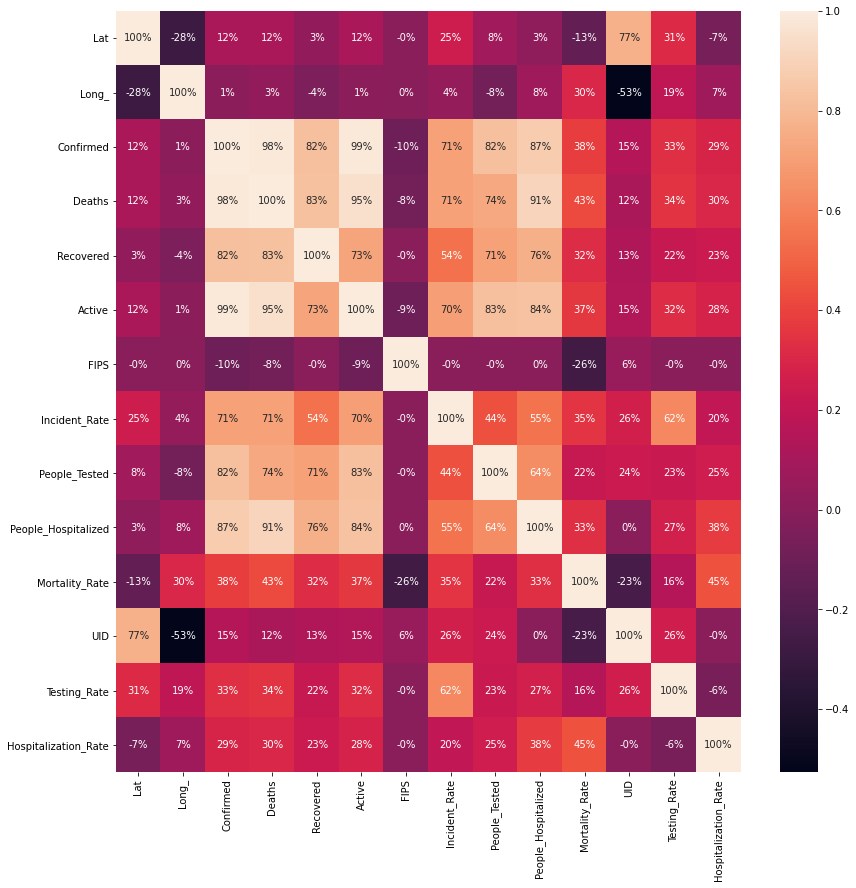

In [17]:
# Visualize the correlation
plt.figure(figsize=(14,14))
sns.heatmap(covid.corr(), annot=True, fmt=".0%")

array([[<AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Long_'}>,
        <AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>],
       [<AxesSubplot:title={'center':'Recovered'}>,
        <AxesSubplot:title={'center':'Active'}>,
        <AxesSubplot:title={'center':'FIPS'}>,
        <AxesSubplot:title={'center':'Incident_Rate'}>],
       [<AxesSubplot:title={'center':'People_Tested'}>,
        <AxesSubplot:title={'center':'People_Hospitalized'}>,
        <AxesSubplot:title={'center':'Mortality_Rate'}>,
        <AxesSubplot:title={'center':'UID'}>],
       [<AxesSubplot:title={'center':'Testing_Rate'}>,
        <AxesSubplot:title={'center':'Hospitalization_Rate'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

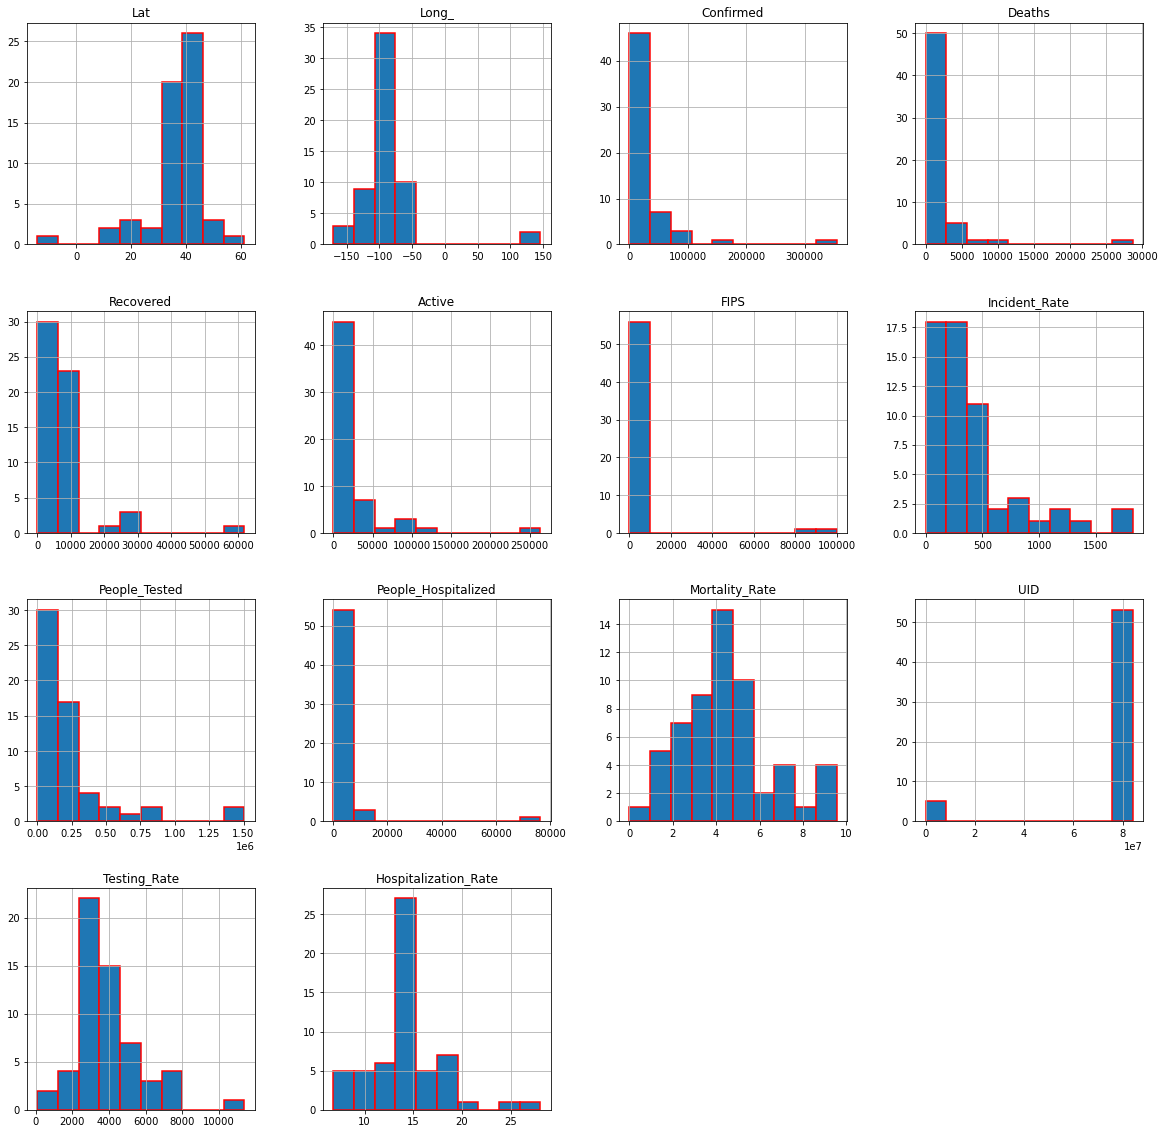

In [18]:
covid.hist(edgecolor='red', linewidth=1.5, figsize=(20,20))

In [19]:
confirmed=covid.groupby('Last_Update').sum()['Confirmed'].reset_index()
recovered=covid.groupby('Last_Update').sum()['Recovered'].reset_index()
deaths=covid.groupby('Last_Update').sum()['Deaths'].reset_index()
active=covid.groupby('Last_Update').sum()['Active'].reset_index()
cases=(deaths, confirmed, recovered,active)
cases

(           Last_Update  Deaths
 0  2020-05-21 02:32:54   93439,
            Last_Update  Confirmed
 0  2020-05-21 02:32:54    1551853,
            Last_Update      Recovered
 0  2020-05-21 02:32:54  406430.857143,
            Last_Update     Active
 0  2020-05-21 02:32:54  1164102.0)

# Total Confirmed, Recovered and Deaths


In [20]:
# Plot the latest recovered,confirmed deaths on scatter plot
fig=go.Figure()
fig.add_trace(go.Scatter(x= confirmed['Last_Update'], y=confirmed["Confirmed"], mode='lines+markers', name='Confirmed cases', line=dict(color="Red", width=2)))
fig.add_trace(go.Scatter(x= recovered['Last_Update'], y=recovered["Recovered"], mode='lines+markers', name='Recovered cases', line=dict(color="Green", width=2)))
fig.add_trace(go.Scatter(x= deaths['Last_Update'], y=deaths["Deaths"], mode='lines+markers', name='Deaths cases', line=dict(color="Black", width=2)))
fig.add_trace(go.Scatter(x= active['Last_Update'], y=active["Active"], mode='lines+markers', name='Active cases', line=dict(color="Blue", width=2)))

fig.update_layout(title= " Total Covid-19 Cases", xaxis_tickfont_size=14,yaxis=dict(title="Number of cases"))
fig.show()

In [21]:
fig1 = px.bar(covid.sort_values(by="Confirmed").tail(10), x="Confirmed", y="Province_State",
              text="Confirmed", orientation="h", color_discrete_sequence=[cnf])
fig2 = px.bar(covid.sort_values(by="Deaths").tail(10), x="Deaths", y="Province_State",
              text="Deaths", orientation="h", color_discrete_sequence=[dth])
fig3 = px.bar(covid.sort_values(by="Active").tail(10), x="Active", y="Province_State",
              text="Active", orientation="h", color_discrete_sequence=[act])
fig4 = px.bar(covid.sort_values(by="Recovered").tail(10), x="Recovered", y="Province_State",
              text="Recovered", orientation="h", color_discrete_sequence=[rec])

fig = make_subplots(rows=2, cols=2, shared_xaxes=False, horizontal_spacing=0.15, vertical_spacing=0.1,
                    subplot_titles=("Confirmed Cases", "Death Cases", "Active Cases", "Recovered Cases"))

fig.add_trace(fig1["data"][0], row=1, col=1)
fig.add_trace(fig2["data"][0], row=1, col=2)
fig.add_trace(fig3["data"][0], row=2, col=1)
fig.add_trace(fig4["data"][0], row=2, col=2)

fig.update_layout(height=1000, plot_bgcolor='rgba(0,0,0,0)')
fig.show()

<AxesSubplot:xlabel='Confirmed', ylabel='Hospitalization_Rate'>

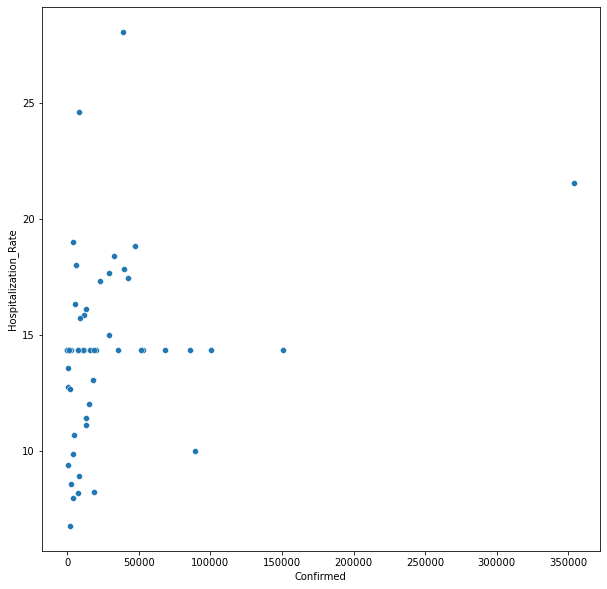

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=covid, x='Confirmed',y='Hospitalization_Rate')

<AxesSubplot:xlabel='Deaths', ylabel='Province_State'>

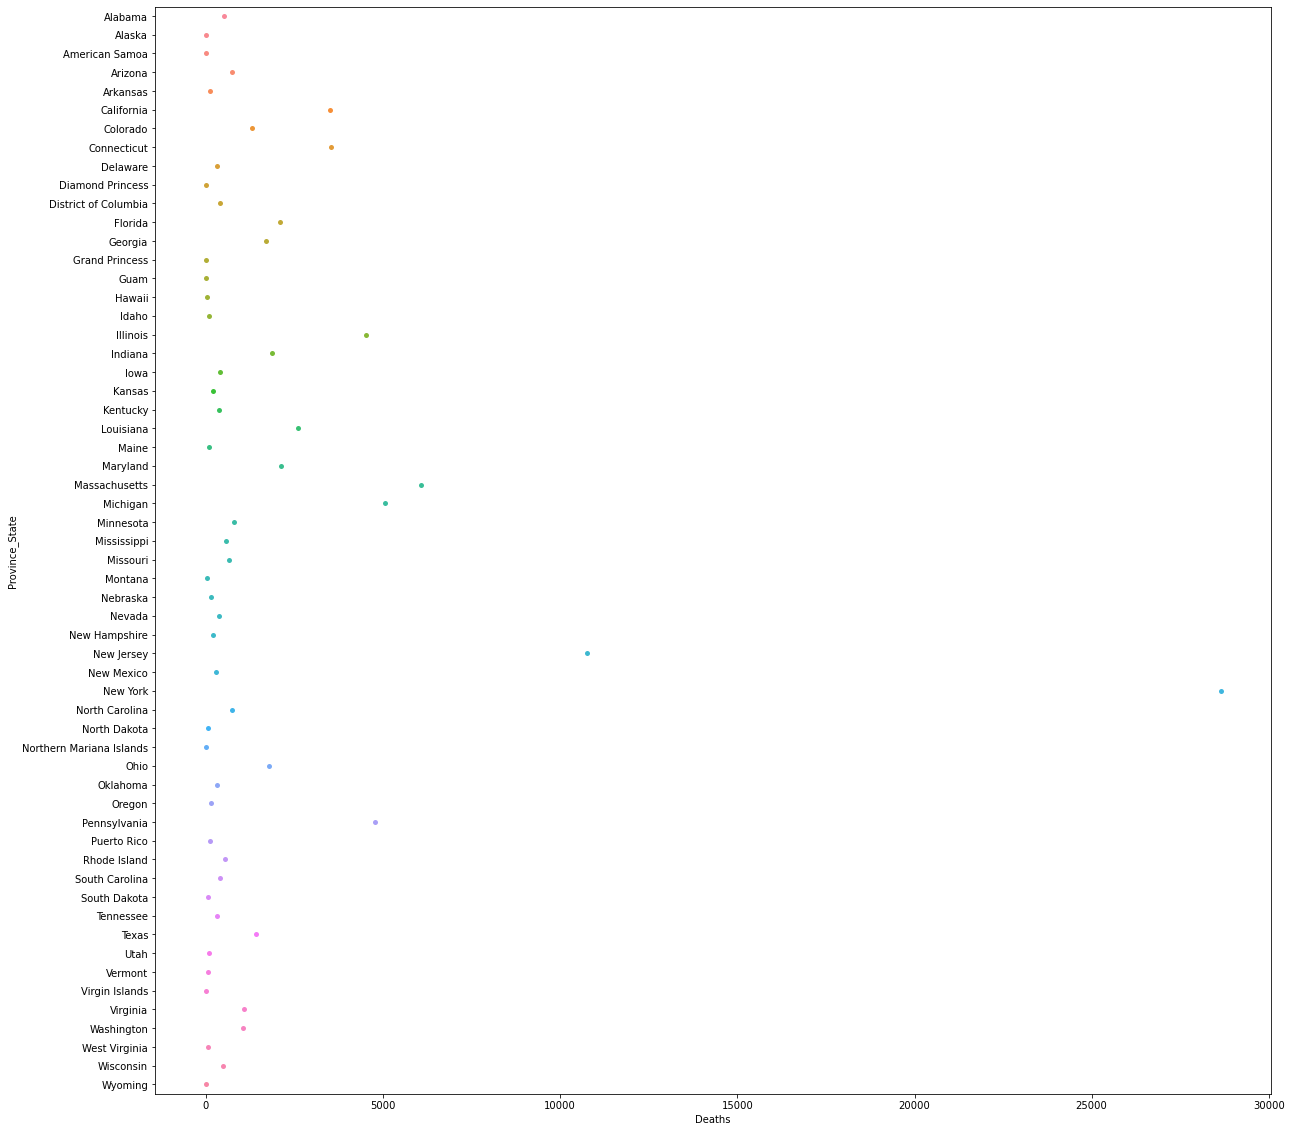

In [23]:
plt.figure(figsize=(20,20))
sns.swarmplot(data=covid, x='Deaths',y='Province_State')

<AxesSubplot:xlabel='Recovered', ylabel='Province_State'>

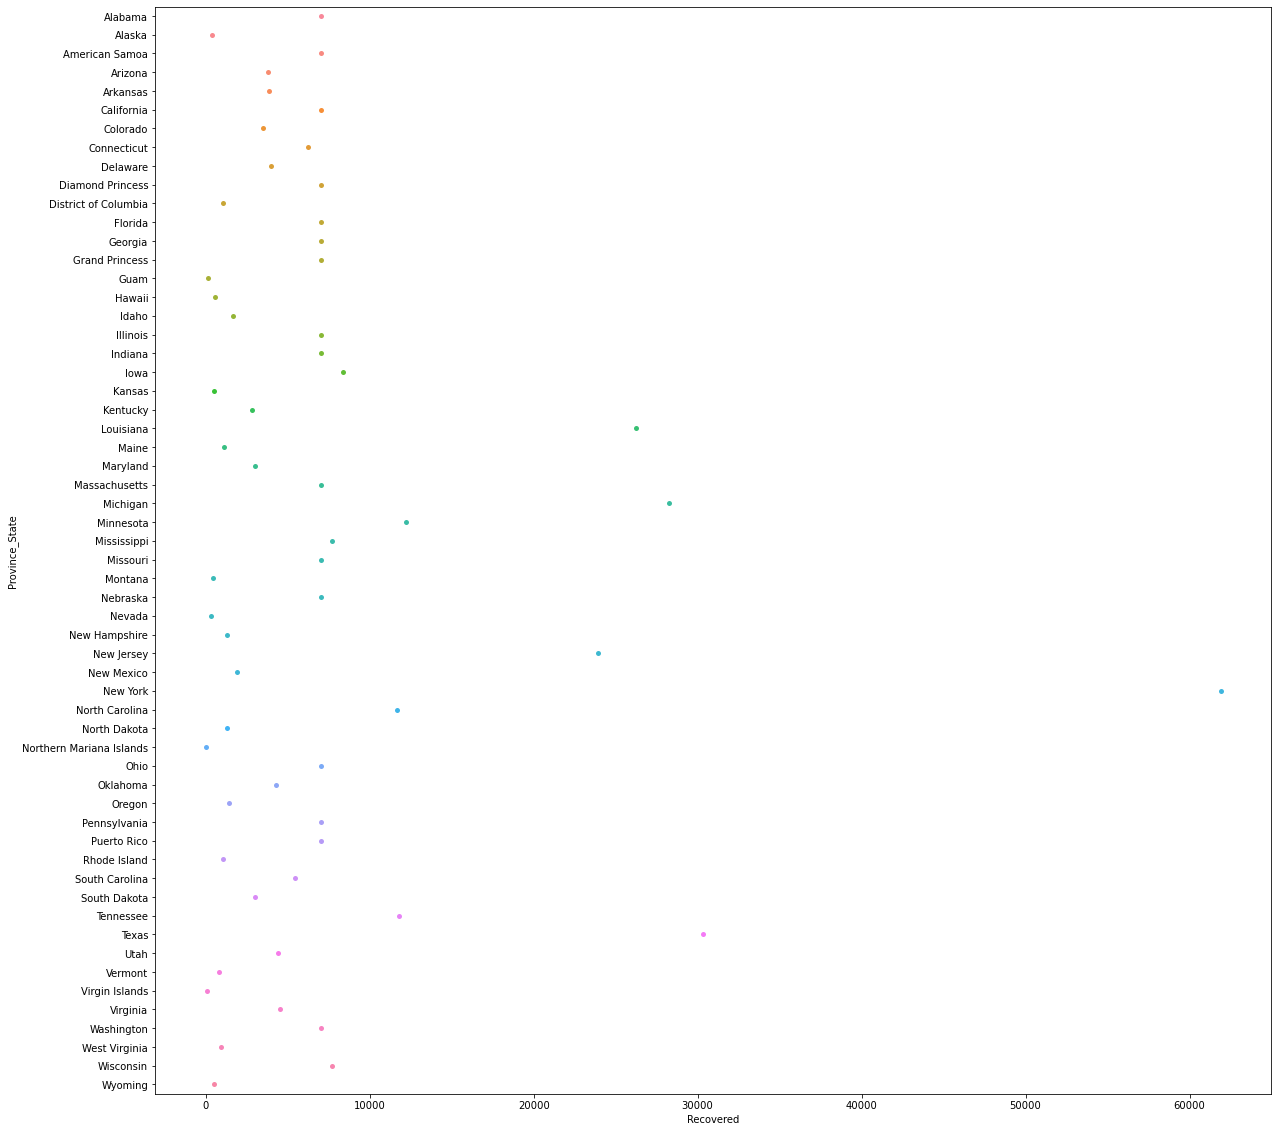

In [24]:
plt.figure(figsize=(20,20))
sns.swarmplot(data=covid, x='Recovered',y='Province_State')

<AxesSubplot:xlabel='Recovered', ylabel='Deaths'>

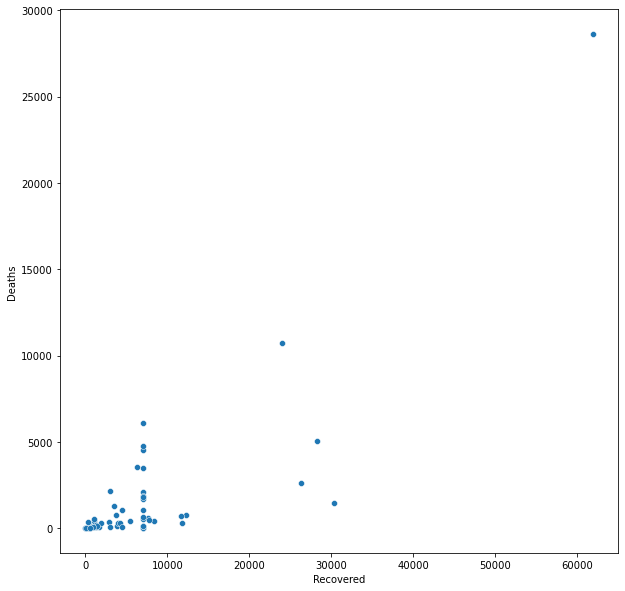

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=covid, x='Recovered',y='Deaths')

<AxesSubplot:xlabel='Recovered', ylabel='Active'>

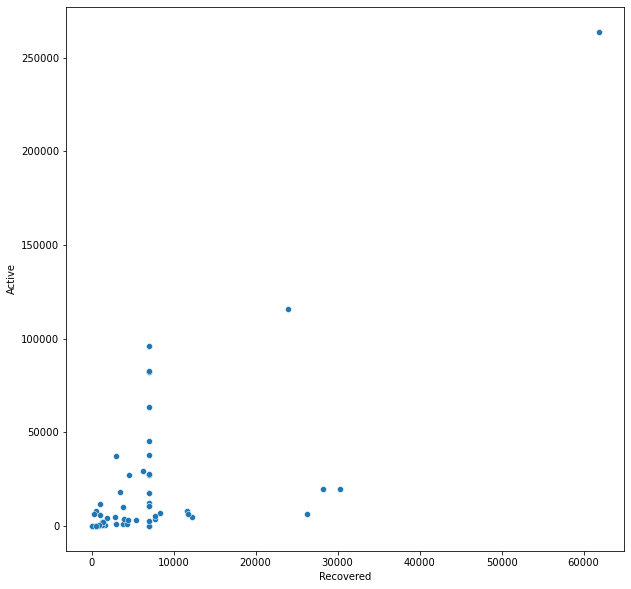

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=covid, x='Recovered',y='Active')

<AxesSubplot:xlabel='Confirmed', ylabel='People_Tested'>

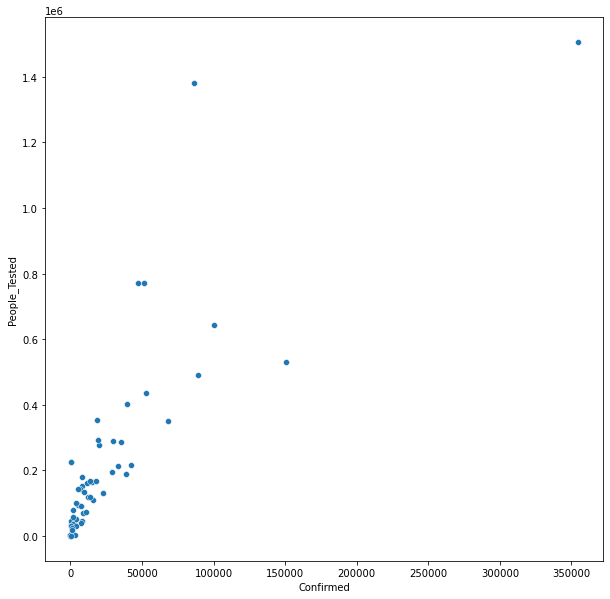

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=covid, x='Confirmed',y='People_Tested')

<AxesSubplot:xlabel='Testing_Rate', ylabel='Hospitalization_Rate'>

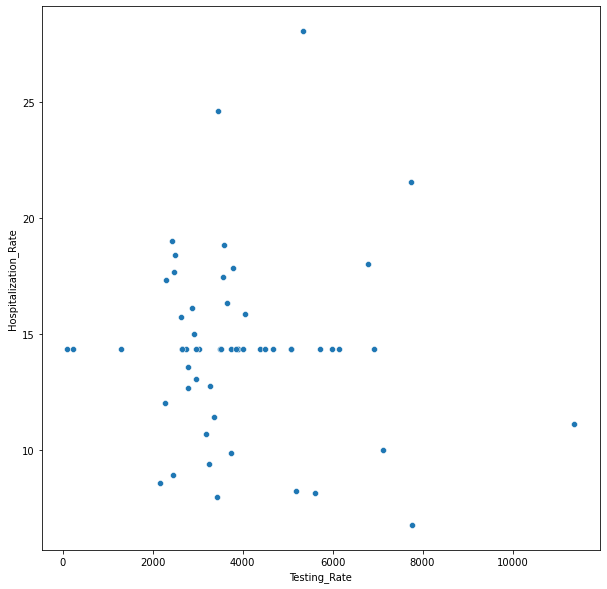

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=covid, x='Testing_Rate',y='Hospitalization_Rate')

<AxesSubplot:xlabel='Confirmed', ylabel='Recovered'>

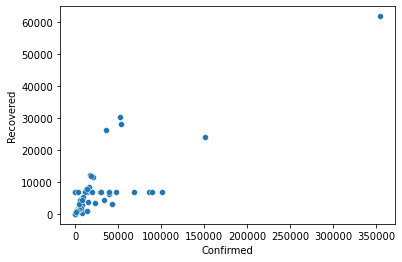

In [29]:
sns.scatterplot(data=covid, x='Confirmed',y='Recovered')

<AxesSubplot:xlabel='Confirmed', ylabel='Deaths'>

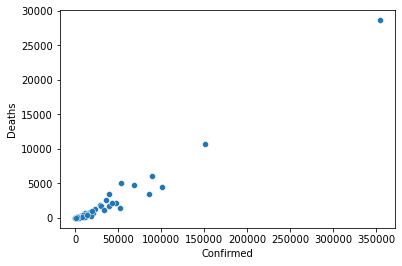

In [30]:
sns.scatterplot(data=covid, x='Confirmed',y='Deaths')

<AxesSubplot:xlabel='Confirmed', ylabel='Active'>

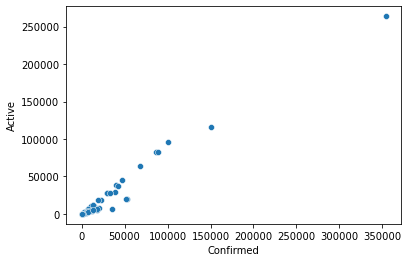

In [31]:
sns.scatterplot(data=covid, x='Confirmed',y='Active')

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
covid['ISO3']=le.fit_transform(covid['ISO3'])
covid['Province_State']=le.fit_transform(covid['Province_State'])


covid.head()

Province_State          Last_Update      Lat     Long_  Confirmed  Deaths  \
0               0  2020-05-21 02:32:54  32.3182  -86.9023      13052     522   
1               1  2020-05-21 02:32:54  61.3707 -152.4044        401      10   
2               2  2020-05-21 02:32:54 -14.2710 -170.1320          0       0   
3               3  2020-05-21 02:32:54  33.7298 -111.4312      14906     747   
4               4  2020-05-21 02:32:54  34.9697  -92.3731       5003     107   

     Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0  7007.428571  12530.0     1     266.194321       164450.0   
1   352.000000     39.0     2      54.815493        37045.0   
2  7007.428571      0.0    60       0.000000          124.0   
3  3773.000000  10386.0     4     204.788838       165435.0   
4  3852.000000   1044.0     5     165.782801        96258.0   

   People_Hospitalized  Mortality_Rate       UID  ISO3  Testing_Rate  \
0          1493.000000        3.999387  84000001     4   3353.942386   
1          4897.454545        2.493766  84000002     4   5063.940017   
2          4897.454545        4.458248        16     0    222.857246   
3          1792.000000        5.011405  84000004     4   2272.859351   
4           535.000000        2.138717  84000005     4   3189.670370   

   Hospitalization_Rate  
0             11.438860  
1             14.342541  
2             14.342541  
3             12.022005  
4             10.693584

In [33]:
#Checking skewness
print(covid.skew())
print("Total count of numeric features: ",len(covid.skew()))
print("count of features which are significantly skewed: ",len(covid.skew().loc[abs(covid.skew())>0.5]))

Province_State          0.000000
Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64
Total count of numeric features:  16
count of features which are significantly skewed:  14


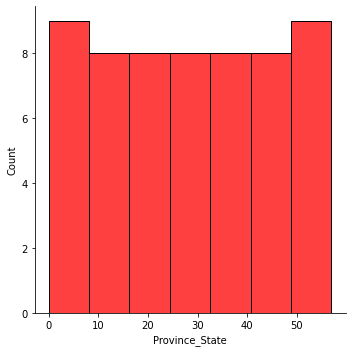

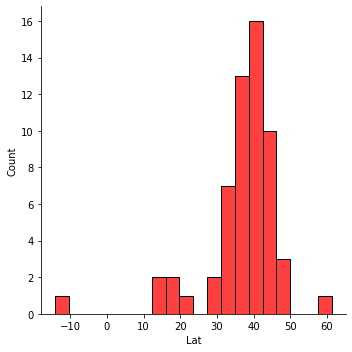

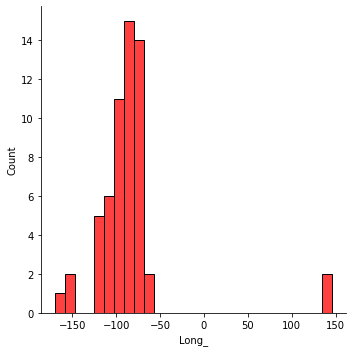

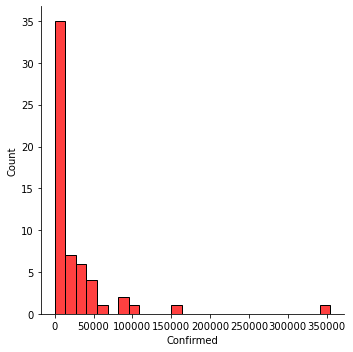

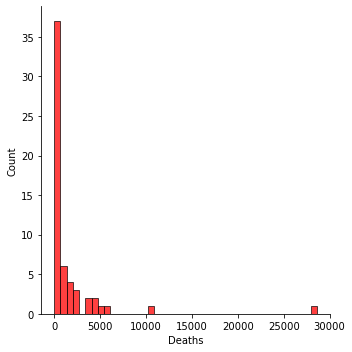

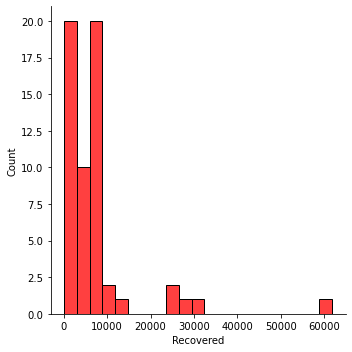

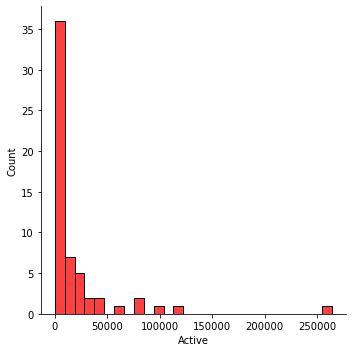

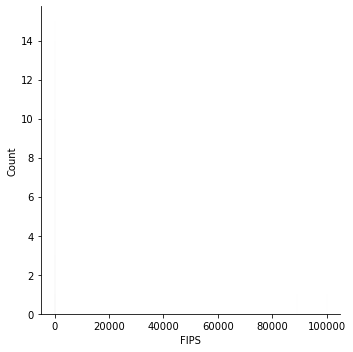

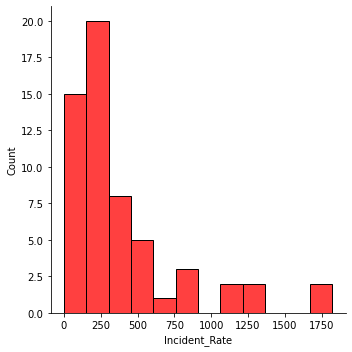

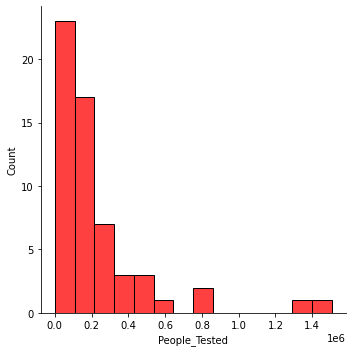

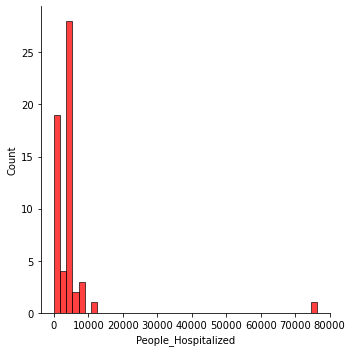

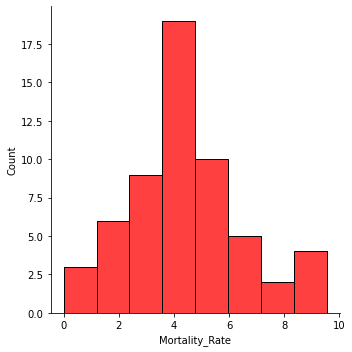

In [ ]:
# To check the distribution of skewness
for col in covid.describe().columns:
    sns.displot(covid[col], color='r')
    plt.show()

In [34]:
#  treat the skewness 
import numpy as np
for index in covid.skew().index:
    if covid.skew().loc[index]>0.5:
        covid[index]=np.log1p(covid[index])
    if covid.skew().loc[index]<-0.5:
        covid[index]=np.square(covid[index])

In [35]:
# checking skewness again
print(covid.skew())
print("Total count of numeric features: ",len(covid.skew()))
print("count of features which are significantly skewed: ",len(covid.skew().loc[abs(covid.skew())>0.5]))

Province_State          0.000000
Lat                     0.320565
Long_                        NaN
Confirmed              -0.321818
Deaths                  0.480964
Recovered              -0.356231
Active                 -0.126725
FIPS                    3.421540
Incident_Rate           0.004837
People_Tested          -0.880168
People_Hospitalized    -0.281041
Mortality_Rate          0.496115
UID                    -3.027471
ISO3                   -2.899119
Testing_Rate           -2.138352
Hospitalization_Rate   -0.300911
dtype: float64
Total count of numeric features:  16
count of features which are significantly skewed:  5


<AxesSubplot:>

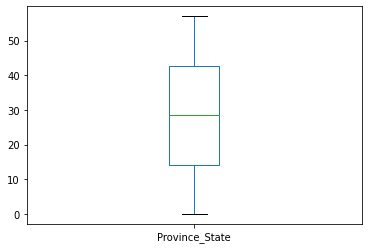

In [36]:
covid['Province_State'].plot.box()

<AxesSubplot:>

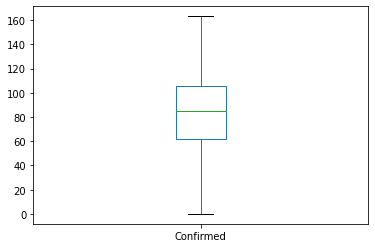

In [37]:
covid['Confirmed'].plot.box()

<AxesSubplot:>

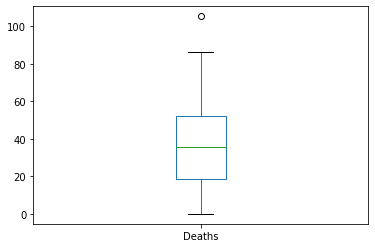

In [38]:
covid['Deaths'].plot.box()

<AxesSubplot:>

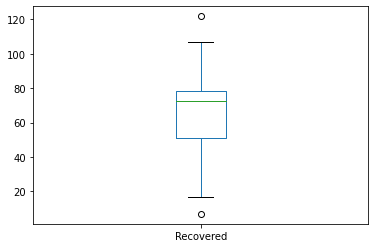

In [39]:
covid['Recovered'].plot.box()

<AxesSubplot:>

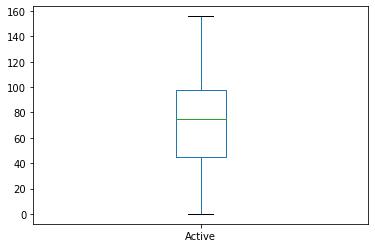

In [40]:
covid['Active'].plot.box()

<AxesSubplot:>

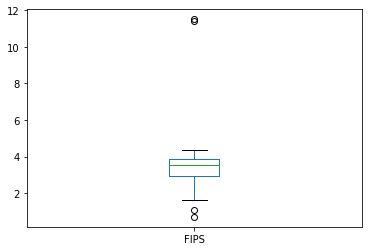

In [41]:
covid['FIPS'].plot.box()

<AxesSubplot:>

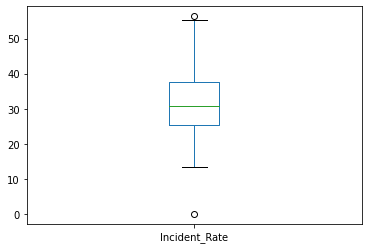

In [42]:
covid['Incident_Rate'].plot.box()

<AxesSubplot:>

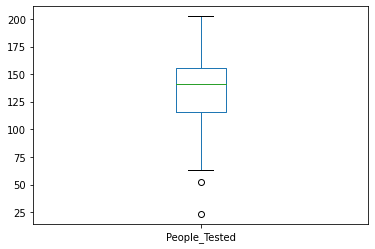

In [43]:
covid['People_Tested'].plot.box()

<AxesSubplot:>

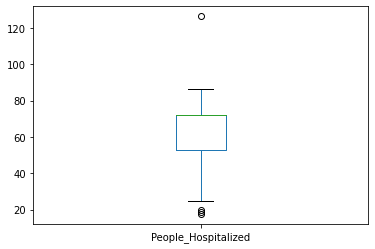

In [44]:
covid['People_Hospitalized'].plot.box()

<AxesSubplot:>

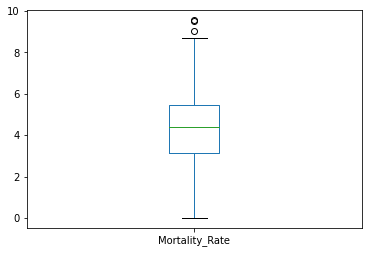

In [45]:
covid['Mortality_Rate'].plot.box()

<AxesSubplot:>

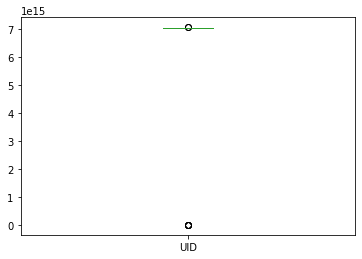

In [46]:
covid['UID'].plot.box()

<AxesSubplot:>

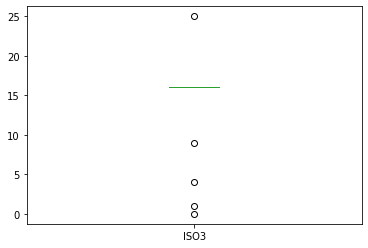

In [47]:
covid['ISO3'].plot.box()

<AxesSubplot:>

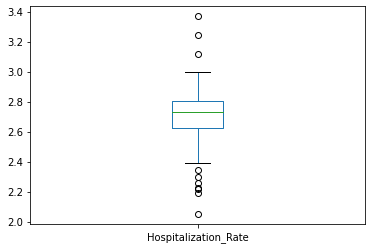

In [48]:
covid['Hospitalization_Rate'].plot.box()

In [49]:
covid.dtypes

Province_State            int32
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed               float64
Deaths                  float64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [50]:
covid=covid.drop(columns=['Last_Update'], axis=1)

In [56]:
covid=covid.drop(columns=['Long_'], axis=1)

In [57]:
# Removing outliers

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(covid))
threshold=3
print(np.where(z>3))

#remove Outliers
covid_new=covid[(z<3).all(axis=1)]

(array([ 1,  2,  2,  2,  2,  9, 13, 14, 14, 36, 39, 39, 44, 44, 52],
      dtype=int64), array([ 1,  8, 11, 12, 13,  6,  6, 11, 12,  9, 11, 12, 11, 13, 11],
      dtype=int64))


In [58]:
covid_new

Province_State          Lat   Confirmed     Deaths   Recovered  \
0                0  1044.466051   89.809232  39.182360   78.408701   
3                3  1137.699408   92.344147  43.790022   67.829896   
4                4  1222.879918   72.556203  21.922353   68.171565   
5                5  1304.379902  129.096846  66.584729   78.408701   
6                6  1525.667976  100.689747  51.410614   66.495873   
7                7  1730.376965  111.762498  66.733429   76.435395   
8                8  1545.944442   81.203158  32.945223   68.649731   
10              10  1513.007727   79.737179  36.135333   48.525493   
11              11   770.967416  115.947570  58.495927   78.408701   
12              12  1091.681248  112.183525  55.312039   78.408701   
15              15   444.969492   41.831127   8.354249   40.466169   
16              16  1957.221840   61.259457  18.980912   55.056102   
17              17  1628.082150  132.643747  70.855886   78.408701   
18              18  1587.974680  105.770718  56.716207   78.408701   
19              19  1764.966132   93.245509  35.716770   81.569302   
20              20  1484.298908   81.880097  28.230158   37.960476   
21              21  1418.885758   81.143692  35.191533   63.154354   
22              22   971.537730  109.665291  61.885320  103.539198   
23              23  1997.544697   56.348920  18.524976   49.055654   
24              24  1525.988283  113.488744  58.691785   64.069868   
25              25  1783.389792  129.870315  75.874893   78.408701   
26              26  1877.194268  118.336015  72.749289  105.028014   
27              27  2087.987330   95.642144  44.465268   88.576025   
28              28  1072.012371   88.171944  40.289350   80.042282   
29              29  1478.871627   87.471517  41.770750   78.408701   
30              30  2201.664700   38.089888   8.027098   37.076467   
31              31  1691.298525   86.802209  24.349033   78.408701   
32              32  1467.924282   79.347969  35.222969   33.873365   
33              33  1888.119756   68.240013  27.586376   51.143744   
34              34  1624.001341  142.171216  86.167796  101.678113   
35              35  1213.860440   76.582766  31.910910   56.860973   
37              37  1269.504026   98.338000  43.413952   87.647622   
38              38  2258.996335   58.488631  15.303924   51.443674   
40              40  1631.255165  105.884258  56.032585   78.408701   
41              41  1264.890564   74.278291  32.533135   69.867302   
42              42  1986.663184   67.951707  24.767879   52.551119   
43              43  1647.613045  123.857510  71.746172   78.408701   
45              45  1737.297425   90.246122  39.560522   48.139792   
46              46  1146.289678   83.253702  36.135333   74.024304   
47              47  1962.472280   69.515373  14.823637   64.229577   
48              48  1277.905205   96.448353  32.759426   87.881212   
49              49   964.381970  117.781315  52.755957  106.508348   
50              50  1612.022500   80.109717  20.347853   70.472659   
51              51  1940.041307   46.938735  16.058719   45.096374   
53              53  1426.520022  108.191233  48.734441   70.848445   
54              54  2246.845321   97.036674  48.233734   78.408701   
55              55  1481.572477   54.133633  18.049712   47.025499   
56              56  1959.700092   90.327047  38.166993   80.151460   
57              57  1828.075536   44.482205   6.174761   39.325296   

        Active      FIPS  Incident_Rate  People_Tested  People_Hospitalized  \
0    89.037357  0.693147      31.225478     144.248938            53.424585   
3    85.531243  1.609438      28.375337     144.392420            56.124752   
4    48.327136  1.791759      26.180541     131.670984            39.490342   
5   128.155208  1.945910      29.024689     199.874045            72.193487   
6    96.026144  2.197225      35.803517     138.988282            68.607902   
7   105.735560  2.302585     

# Model Building

In [59]:
x=covid_new.drop(columns=['Province_State'],axis=1)
x.head()

Lat   Confirmed     Deaths  Recovered      Active      FIPS  \
0  1044.466051   89.809232  39.182360  78.408701   89.037357  0.693147   
3  1137.699408   92.344147  43.790022  67.829896   85.531243  1.609438   
4  1222.879918   72.556203  21.922353  68.171565   48.327136  1.791759   
5  1304.379902  129.096846  66.584729  78.408701  128.155208  1.945910   
6  1525.667976  100.689747  51.410614  66.495873   96.026144  2.197225   

   Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0      31.225478     144.248938            53.424585        3.999387   
3      28.375337     144.392420            56.124752        5.011405   
4      26.180541     131.670984            39.490342        2.138717   
5      29.024689     199.874045            72.193487        4.066421   
6      35.803517     138.988282            68.607902        5.698118   

                UID  ISO3  Testing_Rate  Hospitalization_Rate  
0  7056000168000001    16     65.905007              2.520825  
3  7056000672000016    16     59.741055              2.566641  
4  7056000840000025    16     65.092403              2.459040  
5  7056001008000036    16     66.565562              2.730629  
6  7056001344000064    16     59.852739              2.909563

In [60]:
y=covid_new['Province_State']
y.head()

0    0
3    3
4    4
5    5
6    6
Name: Province_State, dtype: int32

In [61]:
#scaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [62]:
#Splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [63]:
print(y_train.shape, '\t\t',y_test.shape)

(39,) 		 (10,)


In [64]:
print(x.shape,'\t\t' , y.shape)

(49, 14) 		 (49,)


In [65]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_t=ss.fit_transform(x)


from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [66]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_t,y,random_state=42,test_size=0.20)

In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
model=[LinearRegression(), Lasso(), Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean Absolute Error :',mean_absolute_error(y_test,predm))
    print('Mean Squared Error :',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2 score :',r2_score(y_test,predm))
    print('*****************************************************')
    print('\n')

Score of LinearRegression() is: 0.9995773146690362
Error:
Mean Absolute Error : 0.47335871498993926
Mean Squared Error : 0.2684551156017828
Root Mean Squared Error : 0.518126544004245
r2 score : 0.9984695563787596
*****************************************************


Score of Lasso() is: 0.9958622115518245
Error:
Mean Absolute Error : 0.527633002101848
Mean Squared Error : 0.8489195669923291
Root Mean Squared Error : 0.921368312344379
r2 score : 0.9951603696083899
*****************************************************


Score of Ridge() is: 0.9967722539116428
Error:
Mean Absolute Error : 0.9623184804445184
Mean Squared Error : 1.5551971070843318
Root Mean Squared Error : 1.2470754215701358
r2 score : 0.9911339313204245
*****************************************************


Score of ElasticNet() is: 0.9292395964277137
Error:
Mean Absolute Error : 4.014847967412702
Mean Squared Error : 29.71143927867695
Root Mean Squared Error : 5.450820055613371
r2 score : 0.8306171867129757
*********

In [69]:
#Cross Validate the Models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(), Lasso(), Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('score of:',m,'is:')
    print('score:',score)
    print('Mean Score:',score.mean())
    print('Standard Deviation',score.std())
    print('**********************************************************')
    print('\n')

score of: LinearRegression() is:
score: [0.47156219 0.9461646  0.99151711 0.98198082 0.95955158]
Mean Score: 0.8701552606258112
Standard Deviation 0.19993959512493556
**********************************************************


score of: Lasso() is:
score: [ 0.01666884  0.9978163   0.99872879  0.92078296 -0.02321821]
Mean Score: 0.5821557352715006
Standard Deviation 0.47900485662768905
**********************************************************


score of: Ridge() is:
score: [-1.15074531  0.90342069  0.89788425  0.92201271  0.03873343]
Mean Score: 0.322261153304978
Standard Deviation 0.8098056922679683
**********************************************************


score of: ElasticNet() is:
score: [ -4.35481416  -2.27833125   0.39147708  -0.15327371 -15.64979942]
Mean Score: -4.408948294818893
Standard Deviation 5.866072681292641
**********************************************************


score of: SVR() is:
score: [-53.44518748 -21.78832001  -1.0778642  -15.08072215 -69.38470798]
Mean S

# Random Forest regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=20, random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,predrf))
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.9974521970686611


Mean Absolute Error: 2.545
Mean Squared Error: 8.54125
Root Mean Squared Error: 2.922541702012137


r2_score: 0.951306938030899


In [72]:
score=cross_val_score(rf,x,y,cv=5,scoring='r2')
print("score:",score)
print('Mean score:',score.mean())
print("Standard Deviation:",score.std())

score: [-8.97729751 -2.31124242 -1.21854545 -0.35588132 -7.236125  ]
Mean score: -4.0198183413601525
Standard Deviation: 3.438372410131963


# AdaBoost Regressor

In [73]:
from sklearn.ensemble import AdaBoostRegressor 
adb=AdaBoostRegressor( n_estimators=100, random_state=0)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,predadb))
print('Mean Squared Error:',mean_squared_error(y_test,predadb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predadb)))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.9982766158948709


Mean Absolute Error: 2.2693290043290038
Mean Squared Error: 8.200350822698223
Root Mean Squared Error: 2.8636254683003193


r2_score: 0.9532503801225801


In [74]:
score=cross_val_score(adb,x,y,cv=5,scoring='r2')
print("score:",score)
print('Mean score:',score.mean())
print("Standard Deviation:",score.std())

score: [-9.15646634 -4.42697377 -2.08868618 -1.34300191 -6.77925152]
Mean score: -4.758875942892774
Standard Deviation: 2.9096043220622563


In [75]:
# Saving This Linear Regression model
import joblib

# Save the model as a pickle in a file
joblib.dump(model,'covid-19_usamodel.pkl')

['covid-19_usamodel.pkl']